## Exploratory/Descriptive Statistics

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline


Load in dataset for five-thirty-eight data 

In [11]:
five38 = pd.read_csv("fivethirtyeight-bachelorette-dataset/bachelorette.csv")

Look at shape of data

In [12]:
five38.head()
# remove first line, which is just the header info repeated
five38 = five38.drop([0])
five38.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1
2,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,NaN,D1,D6,D13,D9,D7,D1,D1,D1,D1
3,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,NaN,D10,D8,D13,D9,D1,D3,D1,D1,NaN
4,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,NaN,D8,D8,D1,D9,D7,D1,D1,NaN,NaN
5,Bachelorette,13,13_ADAM_G,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,NaN,D10,D8,D13,D9,D7,D3,NaN,NaN,NaN


In [13]:
print("The number of rows of the dataset is: ", len(five38))
print("The number of columns of the dataset is: ", len(five38.columns))
print("The shape of the dataset is: ", five38.shape)

The number of rows of the dataset is:  920
The number of columns of the dataset is:  23
The shape of the dataset is:  (920, 23)


(use df.var.value_counts() ) to count things per person

## Bachelor Contestant Data

In [2]:
bachelor = pd.read_csv("the-bachelor-bachelorette-contestants/bachelor-contestants.csv")

In [3]:
bachelor.head()

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",NaN,NaN,1
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",NaN,6.0,1
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",NaN,5.0,1
3,Kim,24.0,Nanny,"Tempe, Arizona",NaN,4.0,1
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",NaN,3.0,1


In [4]:
print("The number of rows of the dataset is: ", len(bachelor))
print("The number of columns of the dataset is: ", len(bachelor.columns))
print("The shape of the dataset is: ", bachelor.shape)

The number of rows of the dataset is:  423
The number of columns of the dataset is:  7
The shape of the dataset is:  (423, 7)


In [5]:
bachelor.dtypes

Name           object
Age           float64
Occupation     object
Hometown       object
Height        float64
ElimWeek      float64
Season          int64
dtype: object

Split 'Hometown' column into city and state columns
Overall and by season: 
Look at age distributions
Look at height distributions

Look at everything by winner
What will we have to match on to join with other data?

## Histogram of Age (All Seasons)

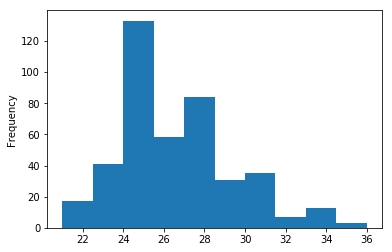

In [6]:
bachelor.Age.plot.hist(bins=10)

Season 1:
Mean Age: 26.4
Winner Age: 23.0
Season 2:
Mean Age: 26.6
Winner Age: 27.0
Season 5:
Mean Age: 25.04
Winner Age: 22.0
Season 9:
Mean Age: 26.307692307692307
Winner Age: 24.0
Season 10:
Mean Age: 25.76
Winner Age: 26.0
Season 11:
Mean Age: 27.0
Winner Age: 0
Season 12:
Mean Age: 26.32
Winner Age: 22.0
Season 13:
Mean Age: 26.92
Winner Age: 25.0
Season 14:
Mean Age: 26.2
Winner Age: 23.0
Season 15:
Mean Age: 26.866666666666667
Winner Age: 25.0
Season 16:
Mean Age: 27.56
Winner Age: 28.0
Season 17:
Mean Age: 26.423076923076923
Winner Age: 26.0
Season 18:
Mean Age: 26.11111111111111
Winner Age: 26.0
Season 19:
Mean Age: 26.833333333333332
Winner Age: 29.0
Season 20:
Mean Age: 25.142857142857142
Winner Age: 25.0
Season 21:
Mean Age: 25.966666666666665
Winner Age: 31.0


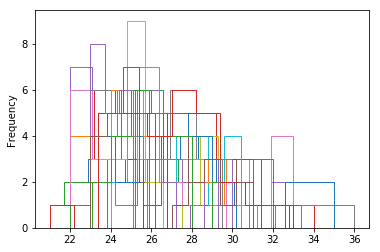

In [7]:
for each_season in bachelor.Season.unique():
    seas = bachelor[bachelor.Season == each_season].copy()
    seas['Winner'] = np.where(seas.ElimWeek.isnull(), 1, 0)
    try:
        wa = seas[seas.Winner == 1].Age.get_values()[0]
    except: 
        wa = 0
    print("Season {}:".format(each_season))
    print("Mean Age: {}".format(seas.Age.mean()))
    print("Winner Age: {}".format(wa))
    seas.Age.plot.hist(bins=10, histtype='step')

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season,Winner,City,State,Other,StateAbbrev
127,Deanna Pappas,25.0,Realtor,"Newnan, Georgia",NaN,8.0,11,0,Newnan,Georgia,None,GA
128,Jenni Croft,27.0,Phoenix Suns Cheerleader,"Wichita, Kansas",NaN,8.0,11,0,Wichita,Kansas,None,KS
129,Bettina Bell,27.0,Realtor,"Washington, D.C.",NaN,7.0,11,0,Washington,D.C.,None,D.C.
130,Sheena Stewart,23.0,Internet marketing executive,"Walnut Creek, California",NaN,6.0,11,0,Walnut Creek,California,None,CA
131,Hillary Reisinger,27.0,Registered nurse,"Philadelphia, Pennsylvania",NaN,5.0,11,0,Philadelphia,Pennsylvania,None,PA
132,Kristy Katzmann,29.0,Acupuncturist,"Gurnee, Illinois",NaN,5.0,11,0,Gurnee,Illinois,None,IL
133,"Estefania ""Stephy"" Kootz",26.0,Executive assistant,"Atlanta, Georgia",NaN,4.0,11,0,Atlanta,Georgia,None,GA
134,Jade Beazley,24.0,Boutique sales worker,"Nashville, Tennessee",NaN,4.0,11,0,Nashville,Tennessee,None,TN
135,McCarten Delaney,26.0,Account manager,"Lemon Grove, California",NaN,4.0,11,0,Lemon Grove,California,None,CA
136,Lindsey Hawkins,25.0,Model,"Livonia, Michigan",NaN,3.0,11,0,Livonia,Michigan,None,MI


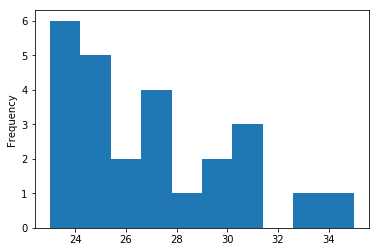

In [23]:
# change season number to look at individual seasons
seas = bachelor[bachelor.Season == 11].copy()
seas.Age.plot.hist(bins=10)
seas

Use dictionary to change state abbreviations to Names

In [9]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

Add in Winner variable

In [11]:
bachelor.head()

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",NaN,NaN,1
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",NaN,6.0,1
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",NaN,5.0,1
3,Kim,24.0,Nanny,"Tempe, Arizona",NaN,4.0,1
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",NaN,3.0,1


In [12]:
bachelor['Winner'] = np.where(bachelor.ElimWeek.isnull(), 1, 0)
bachelor.head()

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season,Winner
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",NaN,NaN,1,1
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",NaN,6.0,1,0
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",NaN,5.0,1,0
3,Kim,24.0,Nanny,"Tempe, Arizona",NaN,4.0,1,0
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",NaN,3.0,1,0


Let's split up Hometown into City and State

In [13]:
bachelor[['City', 'State', 'Other']] = bachelor['Hometown'].str.split(', ',expand=True)
bachelor.head()

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season,Winner,City,State,Other
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",NaN,NaN,1,1,Chanute,Kansas,None
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",NaN,6.0,1,0,Miami,Florida,None
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",NaN,5.0,1,0,Dallas,Texas,None
3,Kim,24.0,Nanny,"Tempe, Arizona",NaN,4.0,1,0,Tempe,Arizona,None
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",NaN,3.0,1,0,Terra Haute,Indiana,None


In [16]:
## need to change State to consistent reference -- change word to two letter abbrev
StateAbbrev = []
for index, row in bachelor.iterrows():
    #print(row['c1'], row['c2'])
    if row['State'] in us_state_abbrev: 
        StateAbbrev.append(us_state_abbrev[row['State']])
    else: 
        StateAbbrev.append(row['State'])

print(StateAbbrev[0:10])

['KS', 'FL', 'TX', 'AZ', 'IN', 'CA', 'CA', 'OK', 'CA', 'NY']


In [17]:
bachelor['StateAbbrev'] = StateAbbrev
bachelor.head()

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season,Winner,City,State,Other,StateAbbrev
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",NaN,NaN,1,1,Chanute,Kansas,None,KS
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",NaN,6.0,1,0,Miami,Florida,None,FL
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",NaN,5.0,1,0,Dallas,Texas,None,TX
3,Kim,24.0,Nanny,"Tempe, Arizona",NaN,4.0,1,0,Tempe,Arizona,None,AZ
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",NaN,3.0,1,0,Terra Haute,Indiana,None,IN


## States of Winners

In [18]:
bach_wins = bachelor[bachelor.Winner == 1].copy()

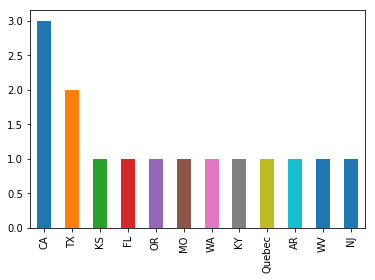

In [19]:
bach_wins.StateAbbrev.value_counts(normalize=False).plot.bar()

California has 3 winners and Texas has 2 winners

In [21]:
bachelor.StateAbbrev.value_counts(normalize=False)

CA                  57
TX                  29
FL                  27
IL                  21
NY                  16
WA                  11
MI                  10
OH                   9
UT                   8
NJ                   8
TN                   7
PA                   7
OK                   7
NC                   7
CO                   7
OR                   7
AZ                   7
SC                   6
GA                   6
KS                   5
MN                   5
VA                   4
LA                   4
NV                   4
CT                   4
MA                   4
KY                   4
AR                   3
HI                   2
IN                   2
AL                   2
British Columbia     2
MD                   2
RI                   2
MO                   2
WI                   2
ID                   2
Alberta              2
Italy                1
ME                   1
D.C.                 1
WV                   1
NE                   1
D.C        

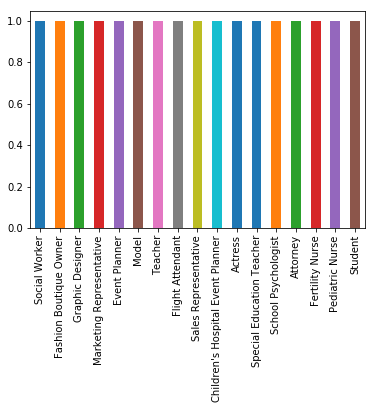

In [77]:
bach_wins.Occupation.value_counts(normalize=False).plot.bar()

Probably want to group occupations into more general topics (or at least decrease the specificity)

Look at losers in comparison (group by season?)

In [73]:
bach_lose = bachelor[bachelor.Winner == 0].copy()
bach_lose.head()

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season,Winner,City,State,Other
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",NaN,6.0,1,0,Miami,Florida,None
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",NaN,5.0,1,0,Dallas,Texas,None
3,Kim,24.0,Nanny,"Tempe, Arizona",NaN,4.0,1,0,Tempe,Arizona,None
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",NaN,3.0,1,0,Terra Haute,Indiana,None
5,Christina,28.0,Attorney,"Bonita, California",NaN,3.0,1,0,Bonita,California,None


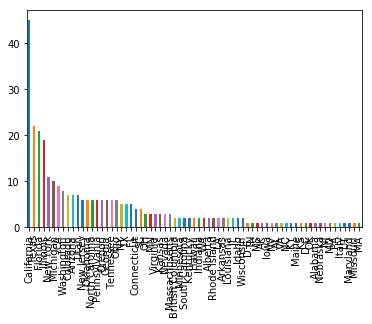

In [75]:
bach_lose.State.value_counts(normalize=False).plot.bar()

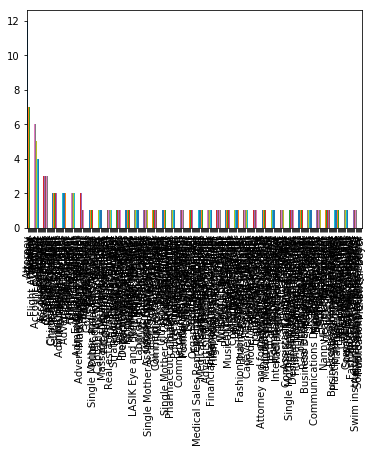

In [78]:
bach_lose.Occupation.value_counts(normalize=False).plot.bar()

## Bachelorette Data

In [2]:
ette = pd.read_csv("the-bachelor-bachelorette-contestants/bachelorette-contestants.csv")

In [3]:
ette.head()

,Name,Age,Occupation,Hometown,ElimWeek,Season
0,Ryan Sutter,29,Firefighter,"Vail, Colorado",NaN,1
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",6.0,1
2,Russ,30,Writer,"San Rafael, California",5.0,1
3,Greg T.,28,Importer,"Manhattan, New York",4.0,1
4,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",3.0,1


In [6]:
print("The number of rows of the dataset is: ", len(ette))
print("The number of columns of the dataset is: ", len(ette.columns))
print("The shape of the dataset is: ", ette.shape)
ette.dtypes

The number of rows of the dataset is:  282
The number of columns of the dataset is:  6
The shape of the dataset is:  (282, 6)


Name           object
Age             int64
Occupation     object
Hometown       object
ElimWeek      float64
Season          int64
dtype: object

Season 1:
Mean Age: 29.72
Winner Age: 29
Season 2:
Mean Age: 29.68
Winner Age: 29
Season 4:
Mean Age: 29.36
Winner Age: 26
Season 5:
Mean Age: 28.533333333333335
Winner Age: 29
Season 6:
Mean Age: 28.16
Winner Age: 26
Season 7:
Mean Age: 29.08
Winner Age: 34
Season 8:
Mean Age: 29.8
Winner Age: 27
Season 9:
Mean Age: 28.68
Winner Age: 27
Season 10:
Mean Age: 29.52
Winner Age: 29
Season 11:
Mean Age: 29.5
Winner Age: 28
Season 12:
Mean Age: 28.307692307692307
Winner Age: 27


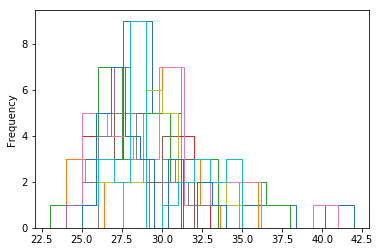

In [7]:
for each_season in ette.Season.unique():
    seas = ette[ette.Season == each_season].copy()
    seas['Winner'] = np.where(seas.ElimWeek.isnull(), 1, 0)
    try:
        wa = seas[seas.Winner == 1].Age.get_values()[0]
    except: 
        wa = 0
    print("Season {}:".format(each_season))
    print("Mean Age: {}".format(seas.Age.mean()))
    print("Winner Age: {}".format(wa))
    seas.Age.plot.hist(bins=10, histtype='step')

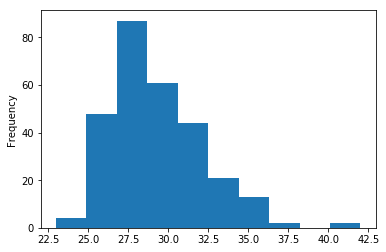

In [8]:
ette.Age.plot.hist(bins=10)

In [10]:
ette['Winner'] = np.where(ette.ElimWeek.isnull(), 1, 0)
ette.head()

,Name,Age,Occupation,Hometown,ElimWeek,Season,Winner
0,Ryan Sutter,29,Firefighter,"Vail, Colorado",NaN,1,1
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",6.0,1,0
2,Russ,30,Writer,"San Rafael, California",5.0,1,0
3,Greg T.,28,Importer,"Manhattan, New York",4.0,1,0
4,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",3.0,1,0


In [12]:
ette[['City', 'State']] = ette['Hometown'].str.split(', ',expand=True)
ette.head()

,Name,Age,Occupation,Hometown,ElimWeek,Season,Winner,City,State
0,Ryan Sutter,29,Firefighter,"Vail, Colorado",NaN,1,1,Vail,Colorado
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",6.0,1,0,Hermosa Beach,California
2,Russ,30,Writer,"San Rafael, California",5.0,1,0,San Rafael,California
3,Greg T.,28,Importer,"Manhattan, New York",4.0,1,0,Manhattan,New York
4,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",3.0,1,0,Ferndale,Michigan


In [13]:
## need to change State to consistent reference -- change word to two letter abbrev
StateAbbrev = []
for index, row in ette.iterrows():
    #print(row['c1'], row['c2'])
    if row['State'] in us_state_abbrev: 
        StateAbbrev.append(us_state_abbrev[row['State']])
    else: 
        StateAbbrev.append(row['State'])

print(StateAbbrev[0:10])
ette['StateAbbrev'] = StateAbbrev
ette.head()

['CO', 'CA', 'CA', 'NY', 'MI', 'IL', 'OH', 'TX', 'TX', 'TX']


,Name,Age,Occupation,Hometown,ElimWeek,Season,Winner,City,State,StateAbbrev
0,Ryan Sutter,29,Firefighter,"Vail, Colorado",NaN,1,1,Vail,Colorado,CO
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",6.0,1,0,Hermosa Beach,California,CA
2,Russ,30,Writer,"San Rafael, California",5.0,1,0,San Rafael,California,CA
3,Greg T.,28,Importer,"Manhattan, New York",4.0,1,0,Manhattan,New York,NY
4,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",3.0,1,0,Ferndale,Michigan,MI


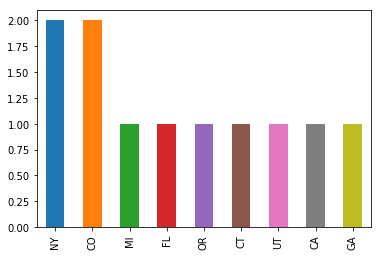

In [14]:
ette_wins = ette[ette.Winner == 1].copy()
ette_wins.StateAbbrev.value_counts(normalize=False).plot.bar()

In [15]:
ette.StateAbbrev.value_counts(normalize=False)

CA                  48
TX                  26
IL                  19
NY                  14
MA                  12
FL                  11
CO                  10
OH                  10
MI                   8
NJ                   8
PA                   7
MO                   7
WA                   6
GA                   6
KS                   6
CT                   5
WI                   5
AZ                   5
MN                   5
NC                   4
OK                   4
British Columbia     3
IN                   3
OR                   3
ID                   3
IA                   3
RI                   3
Ontario              3
Alberta              3
TN                   3
VA                   3
KY                   2
MT                   2
SC                   2
UT                   2
MS                   2
MD                   2
England              2
ND                   1
Brazil               1
NM                   1
AK                   1
Israel               1
Nova Scotia

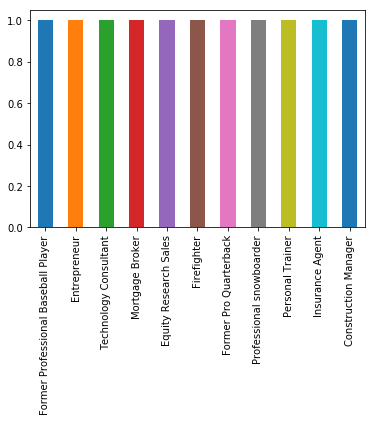

In [16]:
ette_wins.Occupation.value_counts(normalize=False).plot.bar()